<div style="background-color:black; padding:10px; text-align:center;">
    <h1 style="color:white;">EDA on Data Scientist Job Roles in UK</h1>
    
</div>


<img src="my_image.jpg" alt="Data Science Image" width="1000"/>


# About dataset

This dataset provides a collection of data scientist job listings from Glassdoor. It includes key details like job titles, company names, locations, estimated salaries, posting dates, and company ratings. This dataset is ideal for analyzing trends in data science roles, salary ranges, and company preferences within the UK's job market in 2024.

This CSV file contains detailed information on data scientist job listings in UK sourced from Glassdoor. The dataset includes the following column

- Company: Name of the hiring company.
- Company Score: Average rating of the company on Glassdoor.
- Job Title: Title of the job position.
- Location: Job location, including city and state.
- Date: Date the job was posted or updated.
- Salary: Estimated salary range for the position.
- Skills:Skills required for the position

## Importing Libraries and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Cleaned_Dataset.csv")

In [4]:
df.head()

,Company,Company Score,Job Title,Date,Salary,Skills,Estimation Type,Remote,City,Country
0,Razorpoint,3.4,Junior Data Scientist,3.0,35000.0,"Data mining, Big data, R, Data analysis skills...",Employer est.,Onsite,Manchester,England
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,5.0,64480.0,"R, SQL, JavaScript, Python",Employer est.,Onsite,London,England
2,TW,4.0,Data Scientist,31.0,57500.0,"SQL, Maths, Data science, Python",Employer est.,Onsite,Nottingham,England
3,NatWest Group,4.6,Data Scientist,2.0,47500.0,"Software deployment, Data analysis skills, Sta...",Glasdoor est.,Onsite,Edinburgh,Scotland
4,iwoca,3.9,Data Scientist - Ops,7.0,75000.0,"MATLAB, R, Maths, C, Machine learning",Employer est.,Onsite,London,England


In [24]:
df['Company'] = df['Company'].astype('object')
df['Job Title'] = df['Job Title'].astype('object')
df['Salary'] = df['Salary'].astype('float64')
#chnaging the types of columns

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          635 non-null    object 
 1   Company Score    635 non-null    float64
 2   Job Title        635 non-null    object 
 3   Date             635 non-null    float64
 4   Salary           635 non-null    float64
 5   Skills           635 non-null    object 
 6   Estimation Type  635 non-null    object 
 7   Remote           635 non-null    object 
 8   City             581 non-null    object 
 9   Country          581 non-null    object 
dtypes: float64(3), object(7)
memory usage: 49.7+ KB


In [8]:
missing_data = df[['City', 'Country']].isnull().mean() * 100
print(missing_data)

City       8.503937
Country    8.503937
dtype: float64


In [7]:
df.isnull().sum()

Company             0
Company Score       0
Job Title           0
Date                0
Salary              0
Skills              0
Estimation Type     0
Remote              0
City               54
Country            54
dtype: int64

In [9]:
missing_data = df[['City', 'Country']].isnull().mean() * 100
print(missing_data)

City       8.503937
Country    8.503937
dtype: float64


# Data analysis 📝

### 1. Is there a relationship between Company Score and Salary?(using scatterplot)


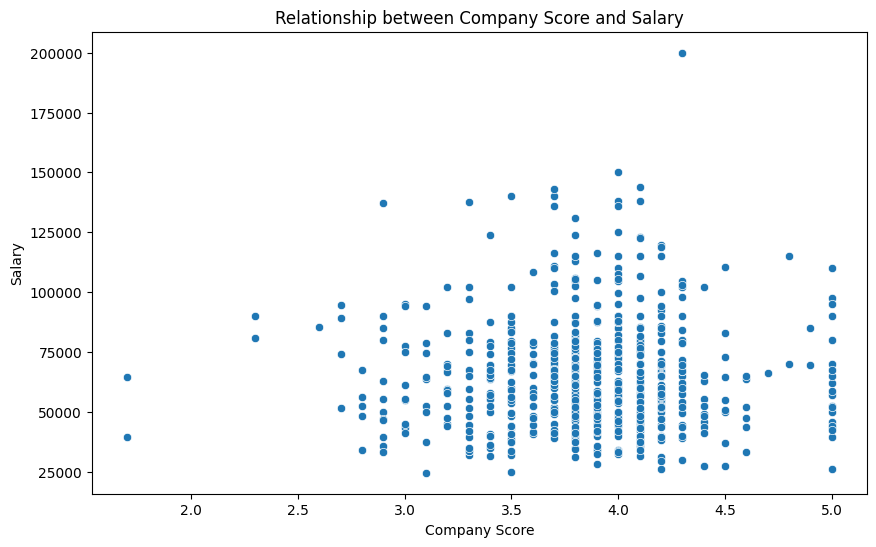

Correlation between Company Score and Salary: 0.02


In [10]:
# Scatter plot of Company Score vs. Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Company Score', y='Salary', data=df)
plt.title('Relationship between Company Score and Salary')
plt.xlabel('Company Score')
plt.ylabel('Salary')
plt.show()

# Calculate and display correlation coefficient
correlation = df['Company Score'].corr(df['Salary'])
print(f'Correlation between Company Score and Salary: {correlation:.2f}')

### 2. Is there a relationship between Company Score and Salary?(using regplot)

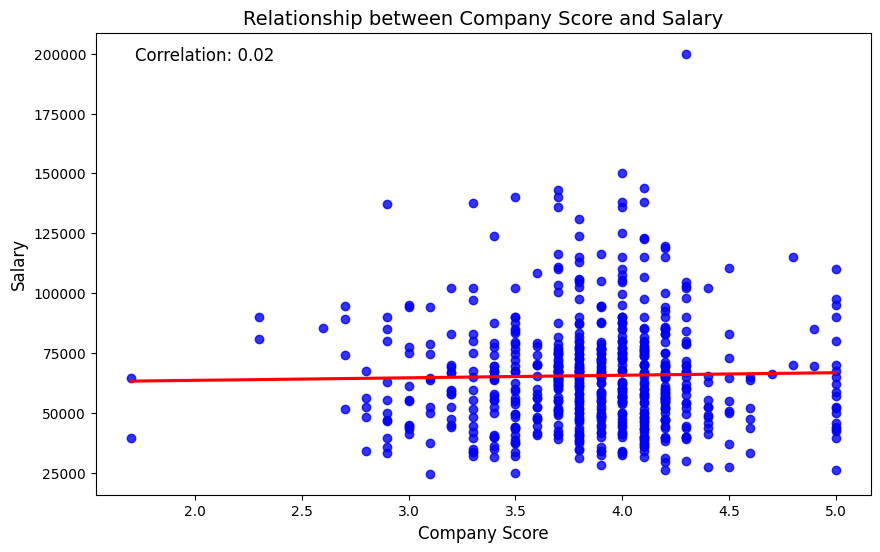

In [11]:


# Scatter plot with regression line of Company Score vs. Salary
plt.figure(figsize=(10, 6))
sns.regplot(x='Company Score', y='Salary', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'}, ci=None)
plt.title('Relationship between Company Score and Salary', fontsize=14)
plt.xlabel('Company Score', fontsize=12)
plt.ylabel('Salary', fontsize=12)

# Calculate and display correlation coefficient on the plot
correlation = df['Company Score'].corr(df['Salary'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', ha='left', va='center', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.show()


#### 3. What is the distribution between Job Title and Salary?

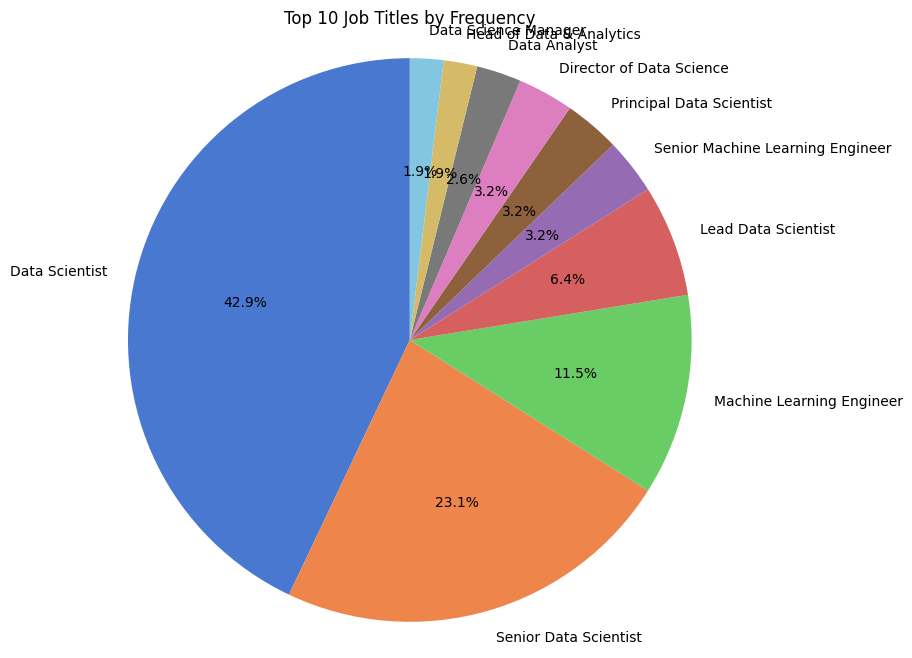

In [22]:
# Identify the top 10 job titles by frequency
top_job_titles = df['Job Title'].value_counts().nlargest(10)

# Pie chart of job title frequencies
plt.figure(figsize=(8, 8))
plt.pie(top_job_titles, labels=top_job_titles.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
plt.title('Top 10 Job Titles by Frequency')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


### 4. Top 10 skills required?

C:\Users\karee\AppData\Local\Temp\ipykernel_1244\816555066.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Skill', data=skills_df, palette='coolwarm')


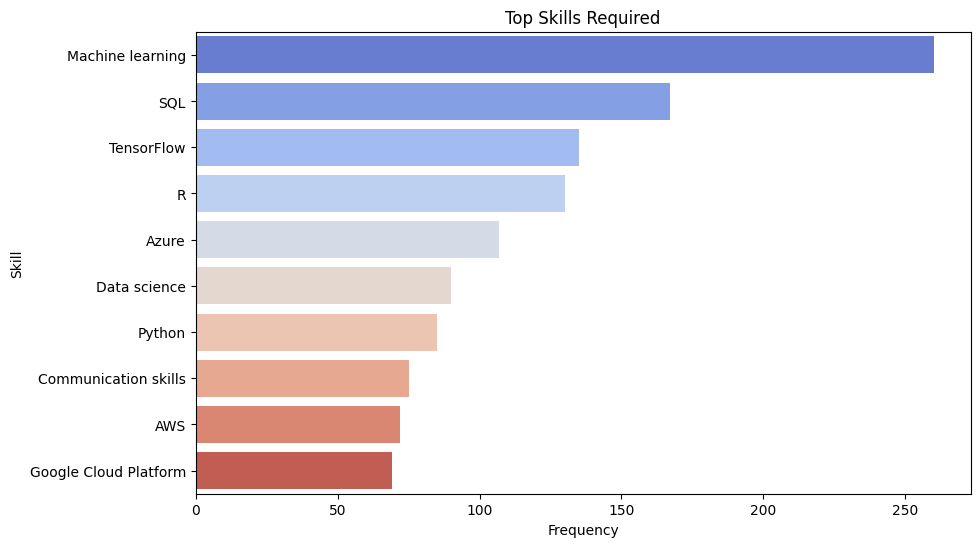

In [13]:
from collections import Counter

# Combine all skills into a single list
all_skills = df['Skills'].str.split(', ').sum()

# Count the frequency of each skill
skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common(10)

# Convert to DataFrame for plotting
skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Frequency'])

# Bar plot of top skills
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Skill', data=skills_df, palette='coolwarm')
plt.title('Top Skills Required')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.show()

### 5.Which cities have the highest salaries?

C:\Users\karee\AppData\Local\Temp\ipykernel_1244\2684653880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='plasma')


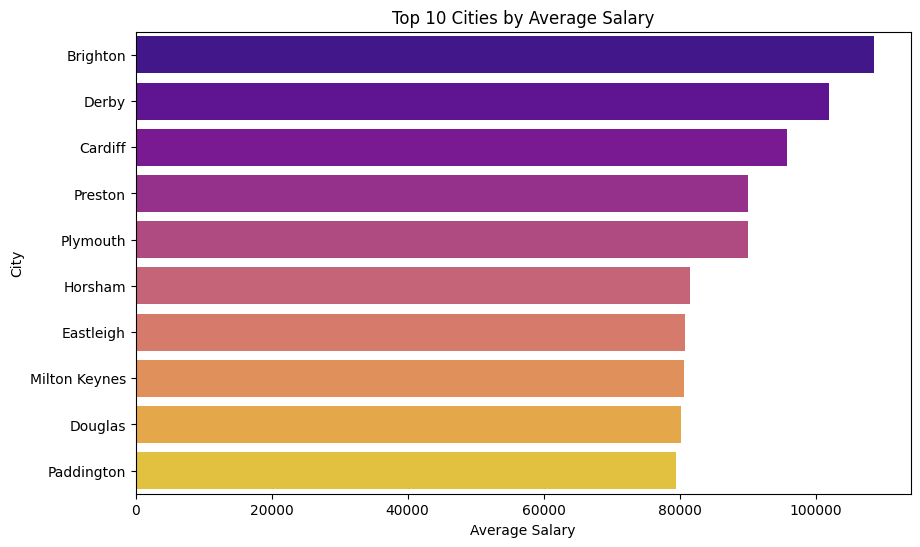

In [14]:
top_cities = df.groupby('City')['Salary'].mean().sort_values(ascending=False).head(10)

# Bar plot for top cities
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='plasma')
plt.title('Top 10 Cities by Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('City')
plt.show()

### 6.Which countries have the highest salaries?

C:\Users\karee\AppData\Local\Temp\ipykernel_1244\4061650914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='inferno')


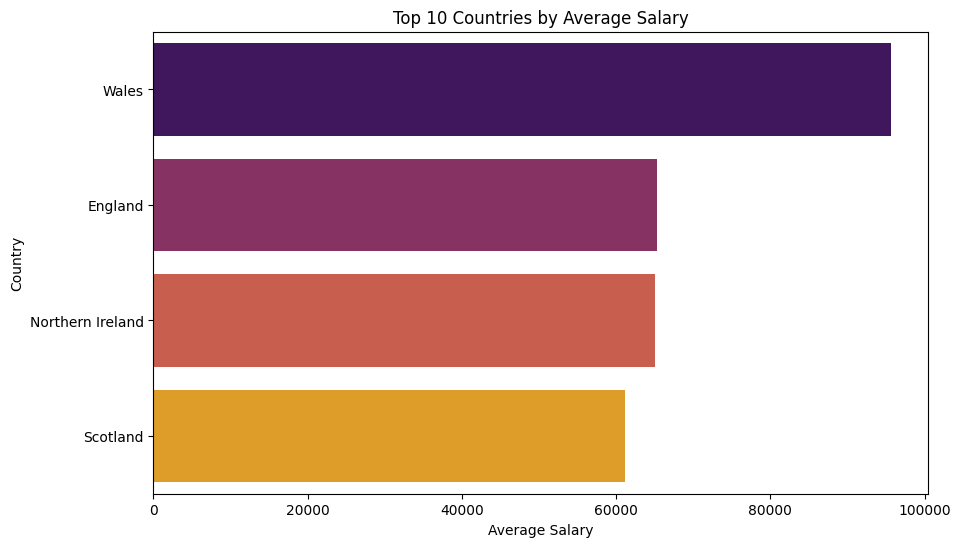

In [15]:
# Top 10 countries by average salary
top_countries = df.groupby('Country')['Salary'].mean().sort_values(ascending=False).head(10)

# Bar plot for top countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='inferno')
plt.title('Top 10 Countries by Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Country')
plt.show()

## 7.Remote jobs V/s Onsite jobs

C:\Users\karee\AppData\Local\Temp\ipykernel_1244\3481514963.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Remote', y='Salary', data=df, palette='Set2', ci=None)  # `ci=None` removes the confidence interval bars
C:\Users\karee\AppData\Local\Temp\ipykernel_1244\3481514963.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Remote', y='Salary', data=df, palette='Set2', ci=None)  # `ci=None` removes the confidence interval bars


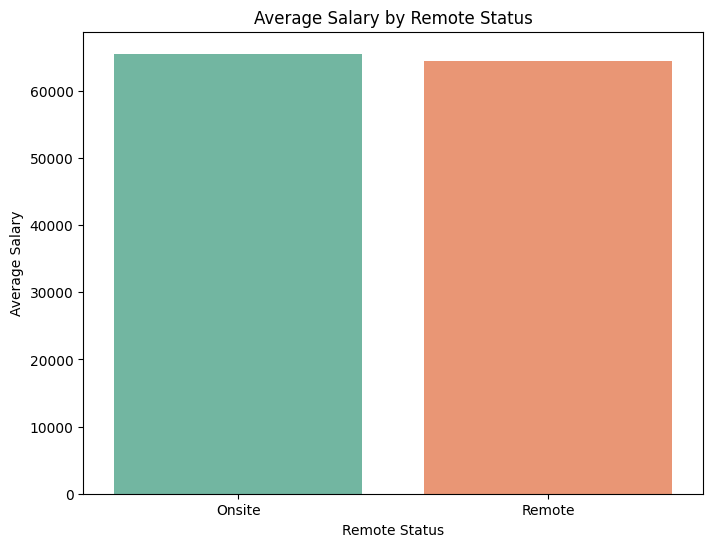

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of Salary by Remote status
plt.figure(figsize=(8, 6))
sns.barplot(x='Remote', y='Salary', data=df, palette='Set2', ci=None)  # `ci=None` removes the confidence interval bars
plt.title('Average Salary by Remote Status')
plt.xlabel('Remote Status')
plt.ylabel('Average Salary')
plt.show()


## 8.Top countries by average yearly salary

In [23]:
#group bying for plotting purpose

Salary_remote=df.groupby("Remote")["Salary"].mean().reset_index()

Estimation_Type=df.groupby("Estimation Type")["Salary"].mean().reset_index()

Salary_grouped_country = df.groupby("Country")["Salary"].mean()

Salary_grouped_country = Salary_grouped_country.sort_values(ascending=False).head()

Country_Salary = Salary_grouped_country.reset_index()

#defining mean for plot
meaner=df["Salary"].mean()

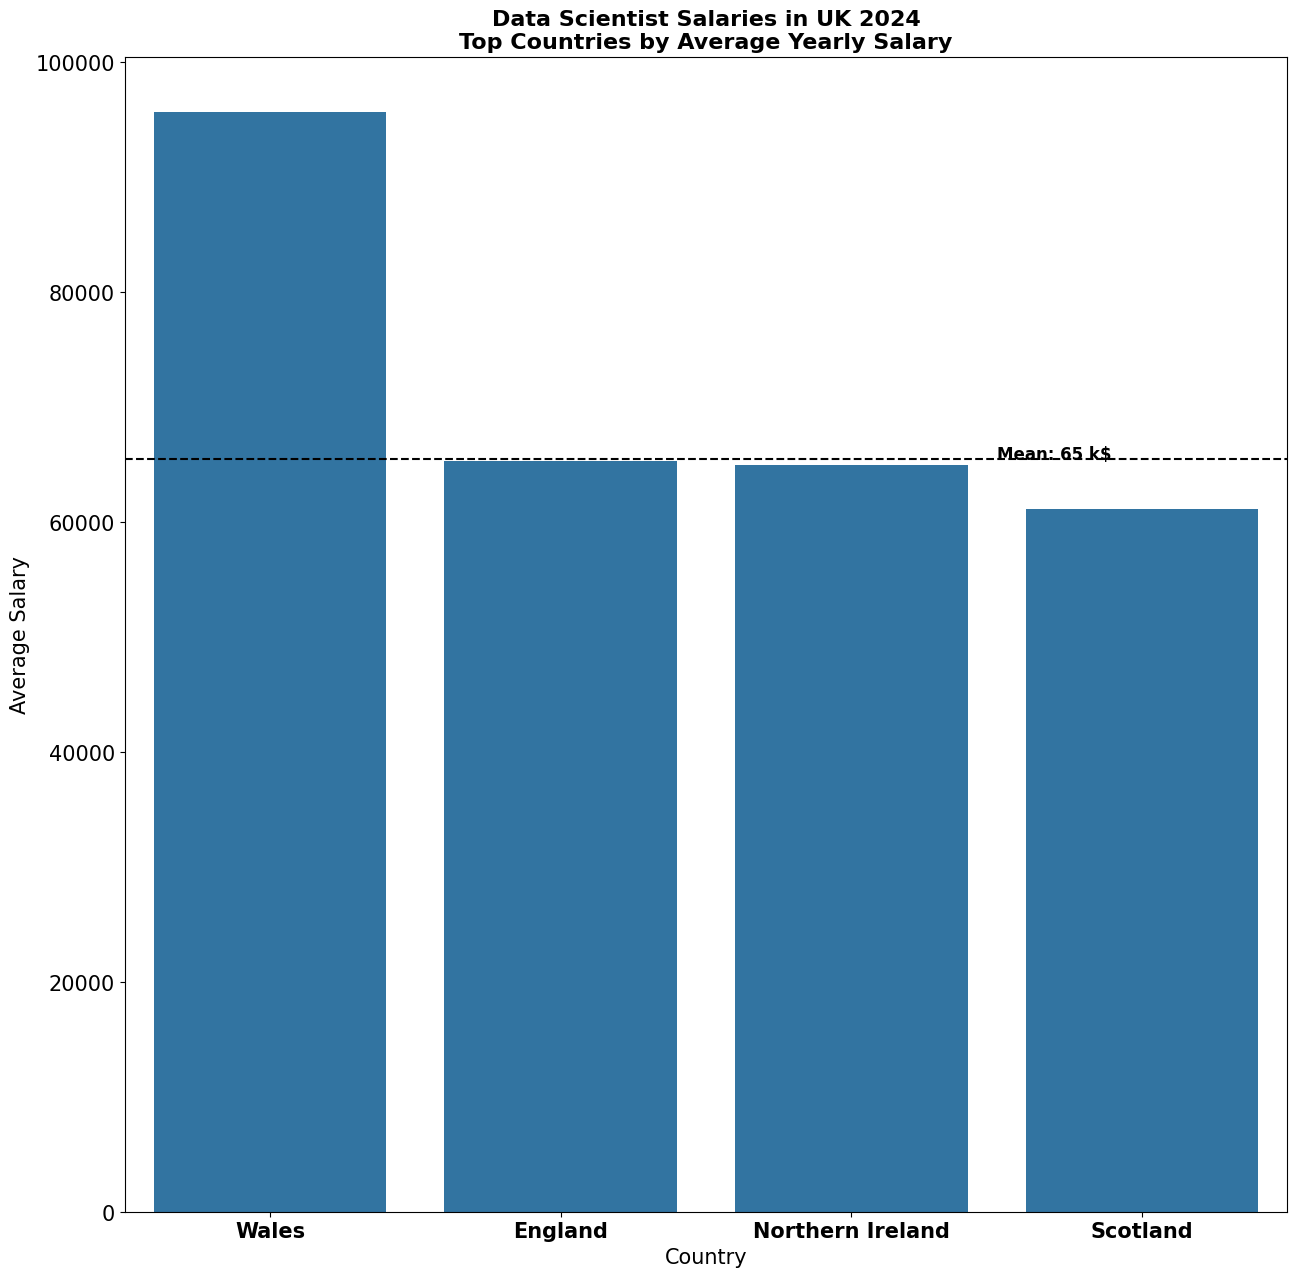

In [18]:
plt.figure(figsize=(15,15))
sns.barplot(x="Country",y="Salary",data=Country_Salary)
plt.title('Data Scientist Salaries in UK 2024\nTop Countries by Average Yearly Salary', fontsize=16, weight='bold', color='black')
plt.ylabel("Average Salary",fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.xticks(fontsize=15,weight="bold")
plt.yticks(fontsize=15)
plt.axhline(y=meaner , color='black', linestyle='--')
plt.text(len(Country_Salary) - 1.5, meaner + 10, f'Mean: {meaner / 1000:.0f} k$', color='black', weight='bold', fontsize=12)
plt.show()

## 9.Top and bottom 10 companies by average yearly salaries

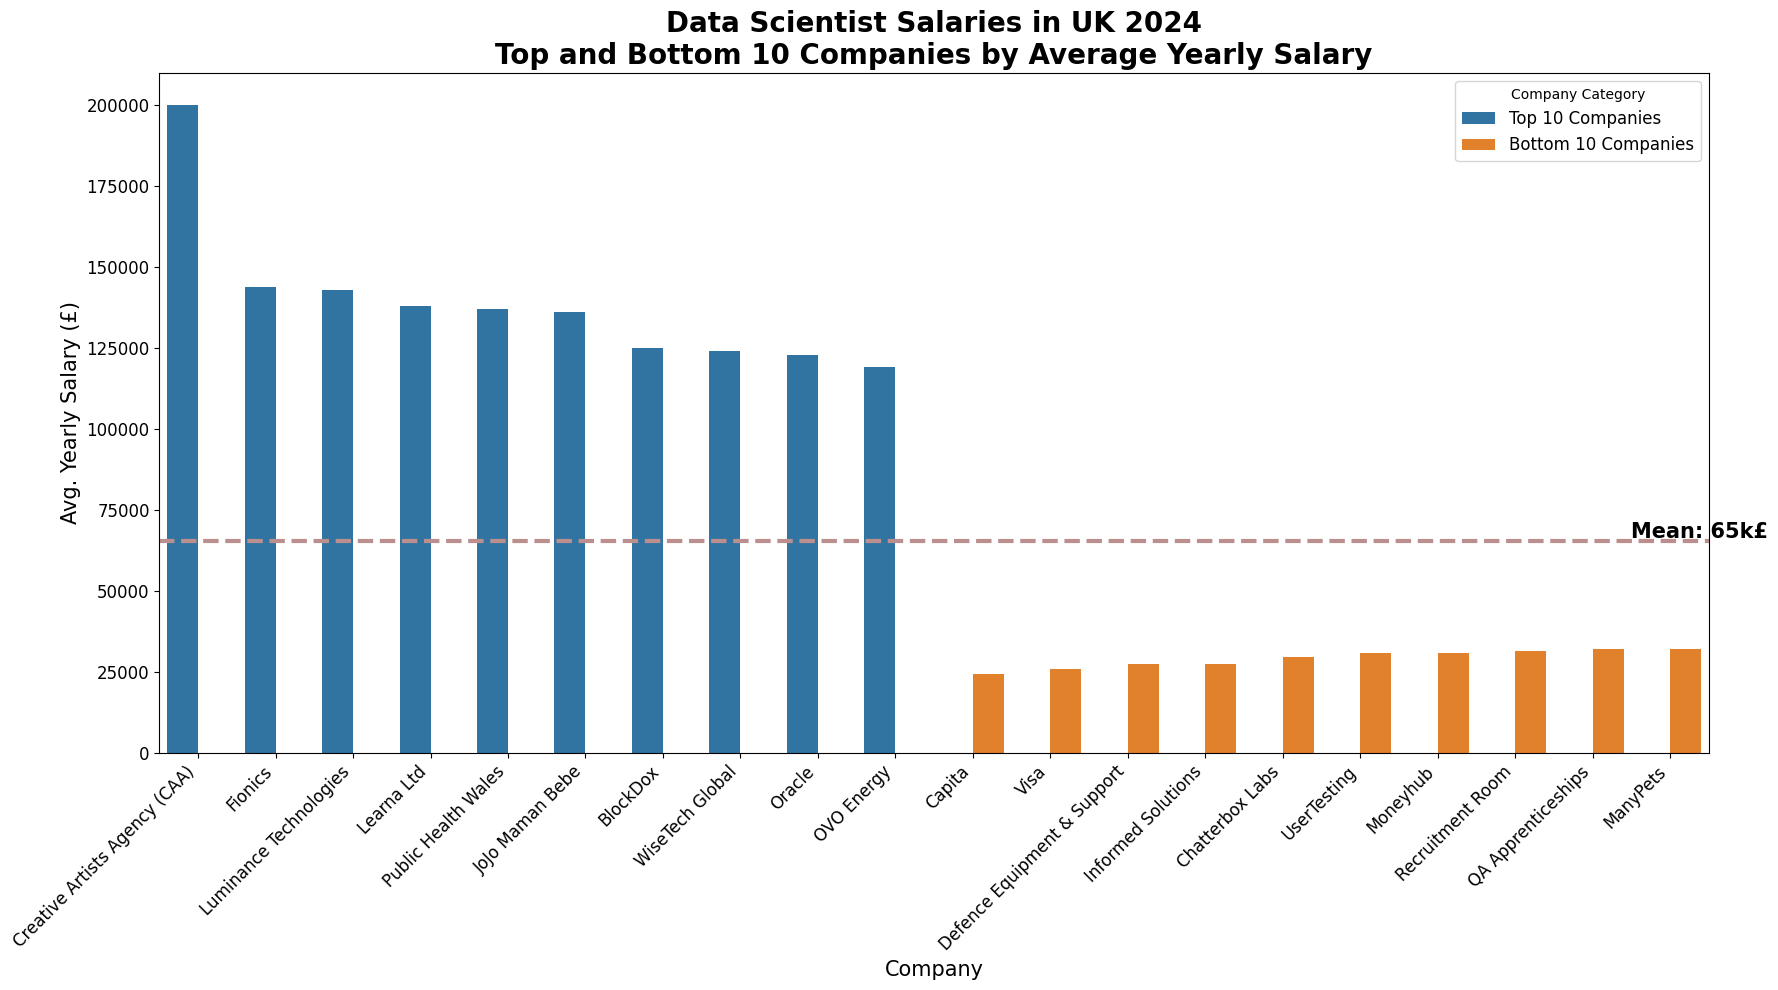

In [19]:




city_avg_salary = df.groupby("Company")["Salary"].mean().reset_index()

# Get top 10 and bottom 10 cities
top_10_companies = city_avg_salary.sort_values(by="Salary", ascending=False).head(10)
bottom_10_companies = city_avg_salary.sort_values(by="Salary", ascending=True).head(10)

# Add labels
top_10_companies["label"] = "Top 10 Companies"
bottom_10_companies["label"] = "Bottom 10 Companies"

# Combine the data
combined_companies = pd.concat([top_10_companies, bottom_10_companies])

# Calculate mean salary for the plot
avg_salary_mean = round(df["Salary"].mean(), 0)

# Plotting
plt.figure(figsize=(18, 10))
sns.barplot(x="Company", y="Salary", hue="label", data=combined_companies, dodge=True)



# Add a horizontal line for the mean salary
plt.axhline(y=avg_salary_mean, color='rosybrown', linestyle='--', linewidth=3)
plt.text(len(combined_companies) - 1.5, avg_salary_mean + 1000, f'Mean: {avg_salary_mean / 1000:.0f}k£', color='black', weight='bold', fontsize=15)

# Titles and labels
plt.title('Data Scientist Salaries in UK 2024\nTop and Bottom 10 Companies by Average Yearly Salary', fontsize=20, weight='bold')
plt.ylabel('Avg. Yearly Salary (£)', fontsize=15)
plt.xlabel('Company', fontsize=15)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Company Category", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## **10.Which cities have the highest salaries?**

C:\Users\karee\AppData\Local\Temp\ipykernel_1244\816555066.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Skill', data=skills_df, palette='coolwarm')


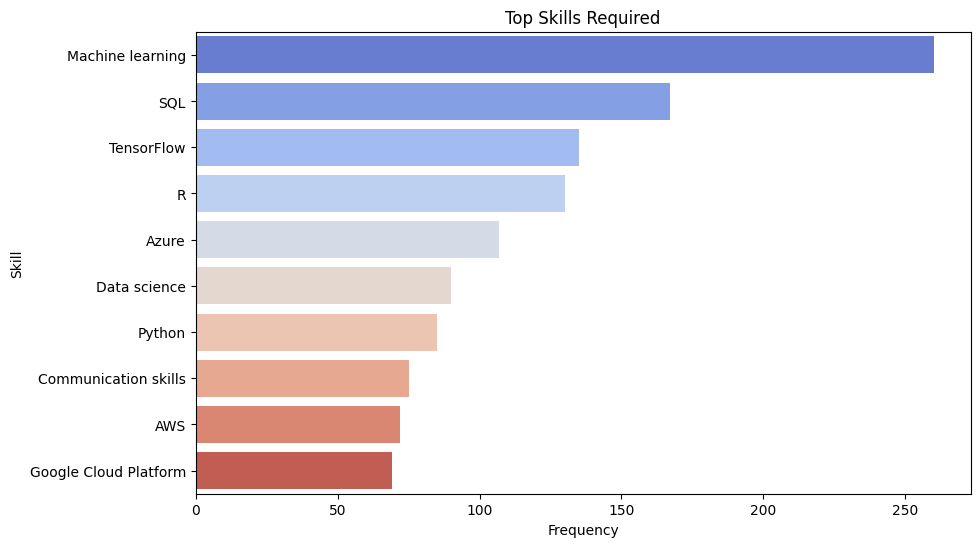

In [20]:
from collections import Counter

# Combine all skills into a single list
all_skills = df['Skills'].str.split(', ').sum()

# Count the frequency of each skill
skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common(10)

# Convert to DataFrame for plotting
skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Frequency'])

# Bar plot of top skills
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Skill', data=skills_df, palette='coolwarm')
plt.title('Top Skills Required')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.show()